In [20]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools

In [21]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)

  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [22]:
def image_to_tensor(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

  # Resize gambar
  img = tf.image.resize(img, [512,512])
  img = img[tf.newaxis,:]
  return img

In [34]:
model_tensor = image_to_tensor('/content/10151234_20200115103521.jpg')
style_tensor = image_to_tensor('/content/creativity-3038628_1280.jpg')

In [32]:
hub_module=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(model_tensor), tf.constant(style_tensor))[0]

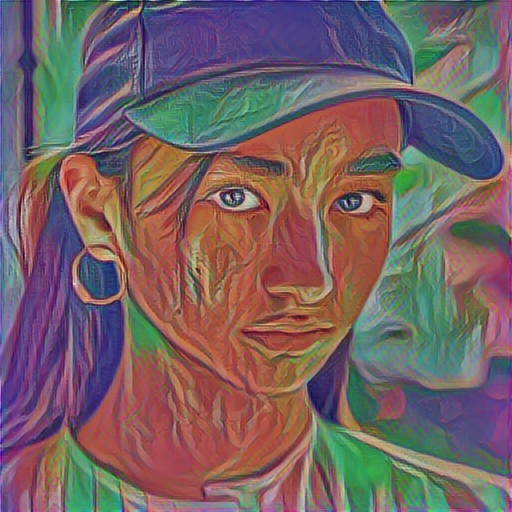

In [30]:
tensor_to_image(stylized_image)